In [2]:
#lets import the data set
import pandas as pd
df_loan=pd.read_csv("LoanApplicationStatus",sep=",")
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#Lets chcek the null values 
for col in df_loan.columns:
    print("Column data type :",df_loan[col].dtype," column name :",col," Null values: ",df_loan[col].isnull().sum())
#Below o/p shows presense of null values in each column

Column data type : object  column name : Loan_ID  Null values:  0
Column data type : object  column name : Gender  Null values:  13
Column data type : object  column name : Married  Null values:  3
Column data type : object  column name : Dependents  Null values:  15
Column data type : object  column name : Education  Null values:  0
Column data type : object  column name : Self_Employed  Null values:  32
Column data type : int64  column name : ApplicantIncome  Null values:  0
Column data type : float64  column name : CoapplicantIncome  Null values:  0
Column data type : float64  column name : LoanAmount  Null values:  22
Column data type : float64  column name : Loan_Amount_Term  Null values:  14
Column data type : float64  column name : Credit_History  Null values:  50
Column data type : object  column name : Property_Area  Null values:  0
Column data type : object  column name : Loan_Status  Null values:  0


In [4]:
df_loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [5]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


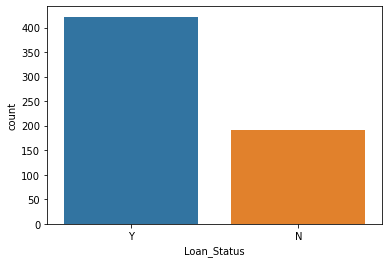

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Loan_Status",data=df_loan)
plt.show()

In [7]:
#we have seen there are null values  
for col in df_loan.columns:
    print("Column data type :",df_loan[col].dtype," column name :",col," Null values: ",df_loan[col].isnull().sum())

Column data type : object  column name : Loan_ID  Null values:  0
Column data type : object  column name : Gender  Null values:  13
Column data type : object  column name : Married  Null values:  3
Column data type : object  column name : Dependents  Null values:  15
Column data type : object  column name : Education  Null values:  0
Column data type : object  column name : Self_Employed  Null values:  32
Column data type : int64  column name : ApplicantIncome  Null values:  0
Column data type : float64  column name : CoapplicantIncome  Null values:  0
Column data type : float64  column name : LoanAmount  Null values:  22
Column data type : float64  column name : Loan_Amount_Term  Null values:  14
Column data type : float64  column name : Credit_History  Null values:  50
Column data type : object  column name : Property_Area  Null values:  0
Column data type : object  column name : Loan_Status  Null values:  0


In [8]:
for col in df_loan.columns:
    if df_loan[col].dtype=="object" and df_loan[col].isnull().sum()>0:
        df_loan.loc[df_loan["Loan_Status"]=="Y",[col]]=df_loan.loc[df_loan["Loan_Status"]=="Y",[col]].fillna(df_loan.loc[df_loan["Loan_Status"]=="Y",[col]].mode().iloc[0])
        df_loan.loc[df_loan["Loan_Status"]=="N",[col]]=df_loan.loc[df_loan["Loan_Status"]=="N",[col]].fillna(df_loan.loc[df_loan["Loan_Status"]=="N",[col]].mode().iloc[0])

In [9]:
df_loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df_loan.loc[df_loan["Loan_Status"]=="Y",["LoanAmount"]]=df_loan.loc[df_loan["Loan_Status"]=="Y",["LoanAmount"]].fillna(df_loan.loc[df_loan["Loan_Status"]=="Y",["LoanAmount"]].mean())
df_loan.loc[df_loan["Loan_Status"]=="N",["LoanAmount"]]=df_loan.loc[df_loan["Loan_Status"]=="N",["LoanAmount"]].fillna(df_loan.loc[df_loan["Loan_Status"]=="N",["LoanAmount"]].mean())

In [11]:
df_loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
for col in df_loan.columns:
    if df_loan[col].isnull().sum()>0:
        df_loan.loc[df_loan["Loan_Status"]=="Y",[col]]=df_loan.loc[df_loan["Loan_Status"]=="Y",[col]].fillna(df_loan.loc[df_loan["Loan_Status"]=="Y",[col]].mode().iloc[0])
        df_loan.loc[df_loan["Loan_Status"]=="N",[col]]=df_loan.loc[df_loan["Loan_Status"]=="N",[col]].fillna(df_loan.loc[df_loan["Loan_Status"]=="N",[col]].mode().iloc[0])

In [13]:
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df_loan.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.724592
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [15]:
df_x=df_loan.drop(columns=["Loan_Status"])
y=df_loan[["Loan_Status"]]

In [16]:
import numpy as np
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.log1p(df_x[index])

In [17]:
df_x.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.181343
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [18]:
df_x.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [19]:
df_x.drop(columns=["Loan_ID"],inplace=True)

In [20]:
df_x=pd.get_dummies(df_x,drop_first=True)

In [21]:
df_x.shape

(614, 14)

In [22]:
#lets bring all features to a common scale using
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [23]:
#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [25]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("Best accuracy is ", maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.8594594594594595 on Random_state  8


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=8)

In [30]:
model=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB()]

In [31]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Acuuracy score of ",m,"is ")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Acuuracy score of  LogisticRegression() is 
0.8594594594594595
[[ 28  24]
 [  2 131]]
              precision    recall  f1-score   support

           0       0.93      0.54      0.68        52
           1       0.85      0.98      0.91       133

    accuracy                           0.86       185
   macro avg       0.89      0.76      0.80       185
weighted avg       0.87      0.86      0.85       185



Acuuracy score of  DecisionTreeClassifier() is 
0.7351351351351352
[[ 32  20]
 [ 29 104]]
              precision    recall  f1-score   support

           0       0.52      0.62      0.57        52
           1       0.84      0.78      0.81       133

    accuracy                           0.74       185
   macro avg       0.68      0.70      0.69       185
weighted avg       0.75      0.74      0.74       185



Acuuracy score of  RandomForestClassifier() is 
0.8432432432432433
[[ 30  22]
 [  7 126]]
              precision    recall  f1-score   support

           0       0.

In [32]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(LogisticRegression(),x,y,cv=5).mean())

0.8078368652538984


In [33]:
print(cross_val_score(RandomForestClassifier(),x,y,cv=5).mean())

0.7833799813407969


In [34]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean())

0.7214447554311608


In [35]:
print(cross_val_score(GaussianNB(),x,y,cv=5).mean())

0.8045848327335733


Decision Tree Classifier is the best model as it has minimum Cross val score

# Hyper Parameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

In [51]:
parameters={'criterion':['gini','entropy'],'splitter':['best']}
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best']})

In [52]:
GCV.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [54]:
Final_mod=DecisionTreeClassifier(criterion='entropy',splitter= 'best')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
accu=accuracy_score(y_test,pred)
print(accu*100)
print(classification_report(y_test,pred))

75.13513513513513
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        52
           1       0.81      0.85      0.83       133

    accuracy                           0.75       185
   macro avg       0.69      0.67      0.68       185
weighted avg       0.74      0.75      0.75       185



# Saving the Model

In [55]:
import joblib
joblib.dump(Final_mod,"LoanApplicationStatus.obj")

['LoanApplicationStatus.obj']

In [56]:
model=joblib.load("LoanApplicationStatus.obj")
model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1])

In [57]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1])